In [1]:
from hopfield import *

In [2]:
!pip3 install tqdm

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
from tqdm import tqdm
import time
import numpy as np

In [22]:
def get_results(n,storkey = False):
    results = []
    for num_nodes in tqdm(range(1,n+1)):
        for num_images in range(0,num_nodes-2):
            per_to_perturb = 10
            #working = True
            num_to_perturb = max(int(num_nodes * per_to_perturb / 100.0), 1)
            h = Hopfield(shape = (num_nodes,1))
            #print(h.values)
            
            #print(h.values)
            v  =list(h.values)

            if storkey == True:
                h.storkey_train(v)
                for train in range(num_images-1):
                    new_img = np.random.choice([-1, 1], size = num_nodes)
                    h.storkey_train(new_img)

            else:
                h.train_on_values()
                for train in range(num_images-1):
                    new_img = np.random.choice([-1, 1], size = num_nodes)
                    h.train_on_new(new_img)

            h.perturb(num = num_to_perturb)

            times = h.sync_update_until_steady()[1]

            ham = Hopfield.hamming_distance(v,h.values)

            dict = {"nodes":num_nodes,"images":num_images+1,"perturbed":num_to_perturb, "times-took":times, "hamming":ham, "per_perturbed": per_to_perturb}
            results.append(dict)
            # if ham > 0:
            #     working = False
            
            # if working == False:
            #     break

        #print(num_nodes)        
    return results

        


In [14]:
print(dic)

[{'nodes': 2, 'images': 1, 'perturbed': 1, 'times-took': 100, 'hamming': 1}, {'nodes': 2, 'images': 2, 'perturbed': 1, 'times-took': 1, 'hamming': 2}]


In [4]:
import pandas as pd

In [29]:
dic1 = get_results(50, storkey = True)

100%|██████████| 50/50 [03:07<00:00,  3.76s/it] 


In [30]:
df = pd.DataFrame.from_dict(dic1)


In [31]:
df_1 = df[df['times-took'] != 20]
df_1 = df_1[df_1['hamming'] == 0]
df_1['wrong'] = df_1['hamming'] / df_1['nodes']

In [32]:
df_1 = df_1.loc[df_1.groupby('nodes')['images'].idxmax()]
#df.loc[df.groupby('YearReleased')['count'].idxmax()]


In [33]:
df_1

,nodes,images,perturbed,times-took,hamming,per_perturbed,wrong
0,3,1,1,1,0,10,0.0
2,4,2,1,1,0,10,0.0
5,5,3,1,1,0,10,0.0
8,6,3,1,1,0,10,0.0
12,7,3,1,1,0,10,0.0
19,8,5,1,1,0,10,0.0
25,9,5,1,1,0,10,0.0
33,10,6,1,1,0,10,0.0
40,11,5,1,1,0,10,0.0
54,12,10,1,1,0,10,0.0


<Axes: xlabel='nodes'>

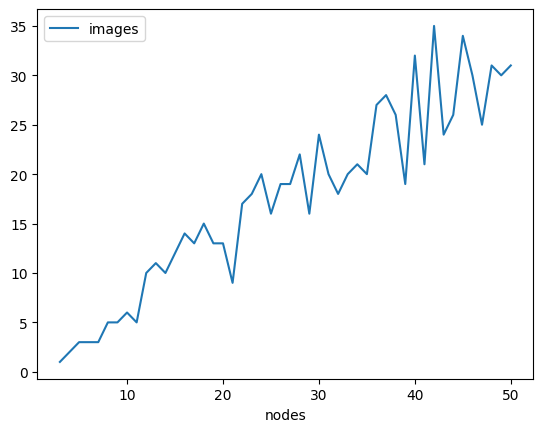

In [34]:
df_1.plot(x = "nodes", y = "images")

In [ ]:
df2 = 

In [18]:
df.head()

,nodes,images,perturbed,times-took,hamming
0,1,1,1,1,1
1,1,1,1,1,0
2,1,1,1,1,1
3,1,1,1,1,0
4,1,1,1,1,0


In [ ]:
df.to_csv("data.csv")

In [24]:
df[df['nodes'] == 10]

,nodes,images,perturbed,times-took,hamming
72,10,1,1,1,0
73,10,1,2,1,0
74,10,1,3,1,0
75,10,1,4,1,0
76,10,1,5,100,5
77,10,1,6,1,0
78,10,1,7,1,0
79,10,1,8,1,0
80,10,1,9,1,10
81,10,2,1,1,0


In [15]:
df.head(20)

,nodes,images,perturbed,times-took,hamming
0,2,1,1,100,1
1,3,1,1,1,0
2,3,1,2,1,0
3,4,1,1,1,0
4,4,1,2,100,2
5,4,1,3,1,0
6,5,1,1,1,0
7,5,1,2,3,0
8,5,1,3,3,5
9,5,1,4,1,5


In [84]:
df_1.to_csv("200withstopage.csv")

In [24]:
df.to_csv("200-correct.csv")